### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [441]:
data = pd.read_csv('data/coupons.csv')

In [442]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [443]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [444]:
#Understand if Car column is important with non null values
data['car'].dropna().unique()

array(['Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
       'Car that is too old to install Onstar :D'], dtype=object)

Since the values of car column has no importance to coupon acceptance car column doesn't need to fill in, but if we drop the entire column a lot of data will be lost and change the meaning of the data. 

Here is a seaborn count plot of type of coupons.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

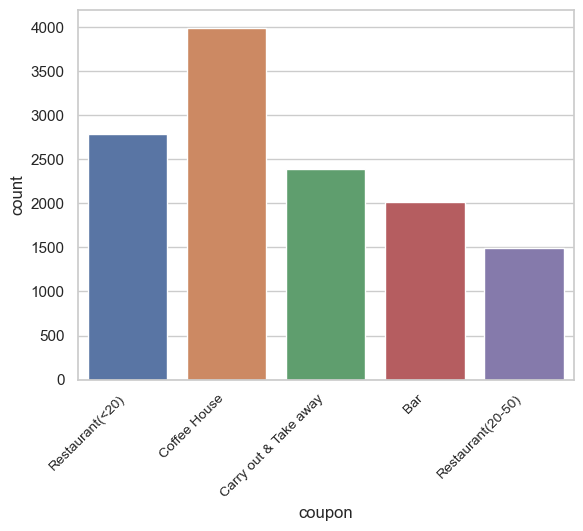

In [445]:
sns.countplot(data=data, x = 'coupon')
plt.xticks(rotation=45, ha='right', fontsize=10)

3. Decide what to do about your missing data -- drop, replace, other...

In [446]:
#Every column will use mode which is the highest frequency of non null values will replace the missing value. 
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)



In [447]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Since car column has no importance in terms of whether the coupon will be accepted or not it doesn't matter if it has null values 
values. However if we dropped the car column it will erase a lot of data so the best thing to do with the car column is
leave it. This follow non null values for the car column, (Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
'Car that is too old to install Onstar :D') does not have any importance with accepting the coupons and since there are 
overwelming more null value than all non null values combined for the car column it is best to leave as it is. For Bar, Coffee House, Carry out and Takeaway, Restaurants less than 20 and Restaurants 20 to 50, those were filled in with the highest frequency of the the non null values, since the missing values in those catagories are small and they are important for the question, will the customer accept the coupon?

The data will fill the missing values of each column with the mode of every non null value for each column

4. What proportion of the total observations chose to accept the coupon? 



In [448]:
data['Y'].mean()


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

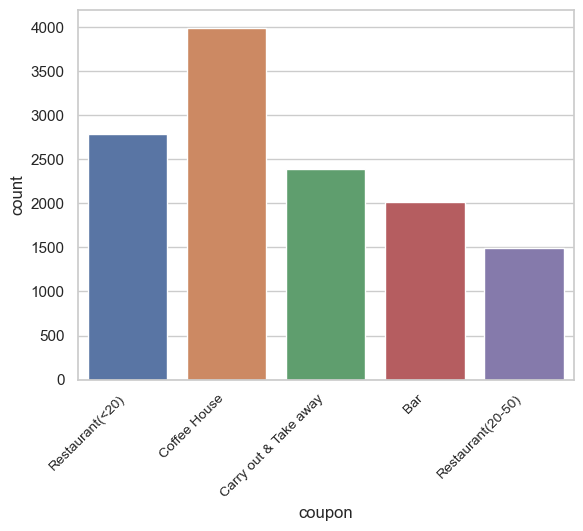

In [449]:
sns.countplot(data=data, x = 'coupon')
plt.xticks(rotation=45, ha='right', fontsize=10)

6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

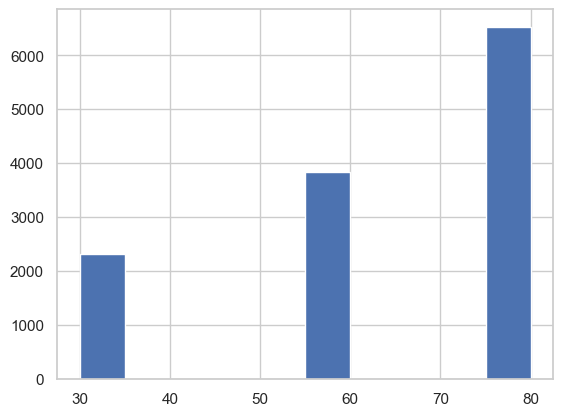

In [450]:
plt.hist(data['temperature'])


In [451]:
bar_coupons_df = data[data['coupon'].isin(['Bar'])]
print(bar_coupons_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [452]:
#Proprtion for bar coupon which is the acceptance rate in decimal. 
proportion = bar_coupons_df['Y'].sum() / bar_coupons_df['Y'].value_counts().sum()
print(proportion)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [453]:
# Corrected code without using .map() or .replace()
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)

# Assign numerical values to 'Bar' column directly
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].apply(lambda x: {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}.get(x, x))

# Create two groups based on the number of times someone goes to a bar
bar_less_than_or_equal_3 = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3]

# Calculate acceptance rates
acceptance_rate_less_than_or_equal_3 = bar_less_than_or_equal_3['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

# Display the acceptance rates
print("Acceptance Rate for those who went to a bar 3 or fewer times a month: {:.2%}".format(acceptance_rate_less_than_or_equal_3))
print("Acceptance Rate for those who went to a bar more than 3 times a month: {:.2%}".format(acceptance_rate_more_than_3))

Acceptance Rate for those who went to a bar 3 or fewer times a month: 40.19%
Acceptance Rate for those who went to a bar more than 3 times a month: 73.47%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [454]:
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)

# Create two groups based on age and bar frequency
age_over_25_and_more_than_1 = bar_coupons_df[(bar_coupons_df['age'] > '25') & (bar_coupons_df['Bar'] > 1)]
all_others = bar_coupons_df[~((bar_coupons_df['age'] > '25') & (bar_coupons_df['Bar'] > 1))]

# Calculate acceptance rates
acceptance_rate_age_over_25_and_more_than_1 = age_over_25_and_more_than_1['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

# Display the acceptance rates
print("Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25: {:.2%}".format(acceptance_rate_age_over_25_and_more_than_1))
print("Acceptance Rate for all others: {:.2%}".format(acceptance_rate_all_others))

Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25: 68.84%
Acceptance Rate for all others: 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [455]:
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)


filtered_group = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                                (bar_coupons_df['passanger'] != 'Kid(s)') & 
                                (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')]
all_others = bar_coupons_df[~(bar_coupons_df['Bar'] > 1) & 
                              (bar_coupons_df['passanger'] != 'Kid(s)') & 
                              (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')]

acceptance_rate_filtered_group = filtered_group['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

print("Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and non-farming/fishing/forestry occupations: {:.2%}".format(acceptance_rate_filtered_group))
print("Acceptance Rate for all others: {:.2%}" .format(acceptance_rate_all_others))

Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and non-farming/fishing/forestry occupations: 71.32%
Acceptance Rate for all others: 30.94%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [456]:
# Assume every null value as not accepted
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)

#Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                        (bar_coupons_df['passanger'] != 'Kid(s)') & 
                        (bar_coupons_df['maritalStatus'] != 'Widowed')]

#Drivers who go to bars more than once a month and are under the age of 30
group2 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                        (pd.to_numeric(bar_coupons_df['age'], errors='coerce') < 30)]
                        

# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
bar_coupons_df['RestaurantLessThan20'] = pd.to_numeric(bar_coupons_df['RestaurantLessThan20'], errors='coerce')
group3 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'] > 4) & 
                        (bar_coupons_df['income'] == 'Less than $50000')]


# Calculate acceptance rates for each group
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()
acceptance_rate_group3 = group3['Y'].mean()

print("Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and not widowed: {:.2%}".format(acceptance_rate_group1))
print("Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: {:.2%}".format(acceptance_rate_group2))
print("Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than $50K: {:.2%}".format(acceptance_rate_group3))

Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and not widowed: 71.32%
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: 73.13%
Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than $50K: nan%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations and analysis of the bar coupons data, we can make the following hypotheses about drivers who accepted the bar coupons we that for Frequency of Bar Visit where drivers who go to bars more frequently for more than once a month they tend to have a higher acceptance rate for bar coupons, which suggests that individuals who already have a habit of visiting bars are more likely to accept such coupons.

In terms of the Age Factor, younger drivers that are under the age of 30, show a higher acceptance rate for bar coupons, which shows that the age demographic plays a role in the likelihood of accepting bar-related offers.

For Passenger and Marital Status the drivers who go to bars more than once a month, have passengers that are not kids, and are not widowed shows a higher acceptance rate. Which shows that social factors, such as having a partner or friends as passenger has an impact to the acceptance of bar coupons.

For Occupation Influence the Drivers that go to bars more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry shows a higher acceptance rate. Which shows the certain occupations may be more receptive to bar-related promotions.

For Income and Restaurant Visits, which is regarding drivers who go to cheap restaurants more than 4 times a month and have an income less than $50K resulted in a NaN (Not a Number) acceptance rate which means there are no acceptance nor non acceptance data for that catagory since there are probably null values in there. 

Overall, the acceptance of bar coupons as a factors based combination of factors such as age, frequency of bar visits, passengers and marital status, occupation, and potentially income. And it shows how certain drivers are impacted in bar acceptence. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine for every catagory who accept the coupons.  

For this Independent Investigation let's look at carryout and takeaway coupons, and see the analysis of every catagory for this coupon and look a graph for each of them. 

In [457]:
#DataFrame for Carry out and Take away coupons
carryout_takeaway_df = data[data['coupon'].isin(['Carry out & Take away'])]
acceptance_rate_carryout_takeaway = carryout_takeaway_df['Y'].mean()
print("Acceptance rate of Carryout and Takeaway coupons: {:.2%} ".format(acceptance_rate_carryout_takeaway))

Acceptance rate of Carryout and Takeaway coupons: 73.55% 


# Acceptance of Carryout and Takeaway Coupons by Passenger Type

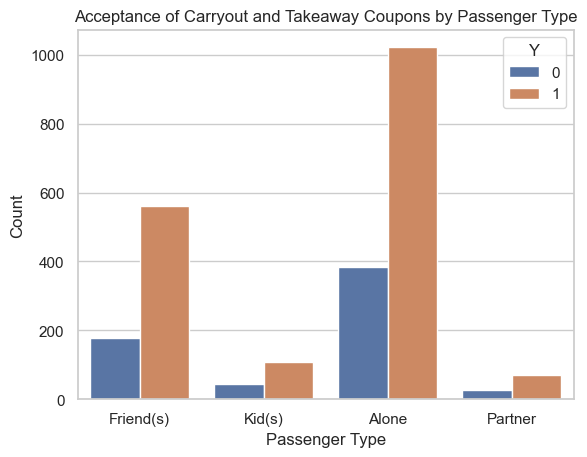

In [458]:
sns.countplot(x='passanger', hue='Y', data=carryout_takeaway_df)
plt.title('Acceptance of Carryout and Takeaway Coupons by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.savefig("images/passenger_carryaway")
plt.show()



In [459]:
#Acceptance rate in decimals (proportion)
group_passenger = carryout_takeaway_df.groupby('passanger')['Y'].mean()
print("\nAcceptance Rate by Passenger:")
print(group_passenger)



Acceptance Rate by Passenger:
passanger
Alone        0.727402
Friend(s)    0.757781
Kid(s)       0.703947
Partner      0.731959
Name: Y, dtype: float64


# Acceptance of Carryout and Takeaway Coupons by Gender

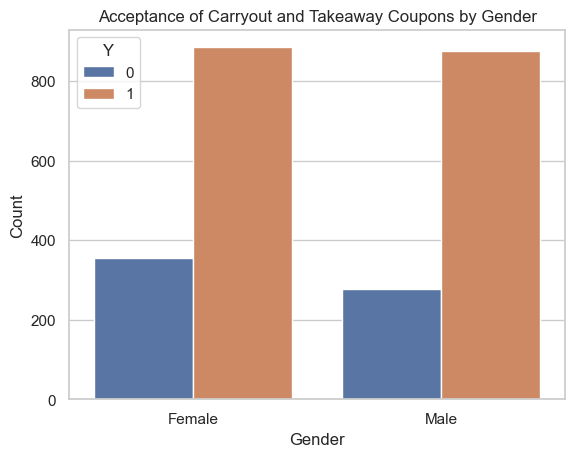

In [460]:

sns.countplot(x='gender', hue='Y', data=carryout_takeaway_df)
plt.title('Acceptance of Carryout and Takeaway Coupons by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig("images/gender_carryaway")
plt.show()

In [461]:
group_gender = carryout_takeaway_df.groupby('gender')['Y'].mean()
print("\nAcceptance Rate by Gender:")
print(group_gender)


Acceptance Rate by Gender:
gender
Female    0.71371
Male      0.75889
Name: Y, dtype: float64


# Acceptance of Carryout and Takeaway Coupons by Age

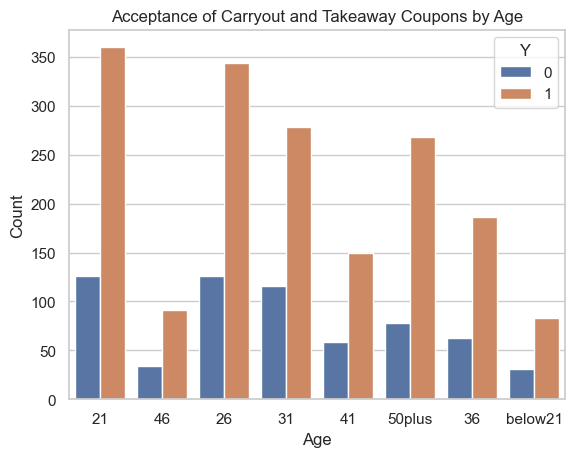

In [462]:
sns.countplot(x='age', hue='Y', data=carryout_takeaway_df)
plt.title('Acceptance of Carryout and Takeaway Coupons by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig("images/age_carryaway")
plt.show()

In [463]:
group_age = carryout_takeaway_df.groupby('age')['Y'].mean()
print("\nAcceptance Rate by Age:")
print(group_age)


Acceptance Rate by Age:
age
21         0.740741
26         0.731915
31         0.705584
36         0.746988
41         0.717703
46         0.728000
50plus     0.774566
below21    0.728070
Name: Y, dtype: float64


# Acceptance of Carryout and Takeaway Coupons by Marital Status

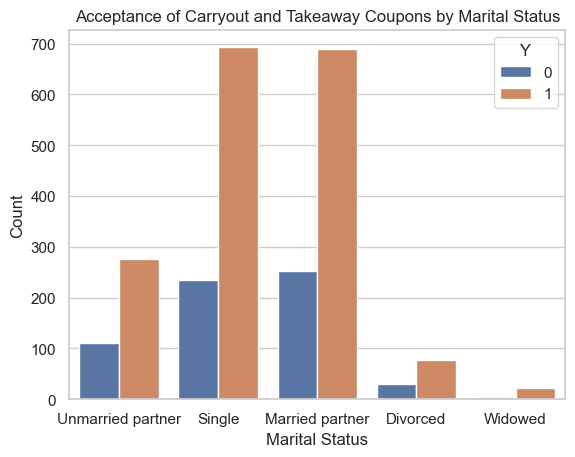

In [464]:
sns.countplot(x='maritalStatus', hue='Y', data=carryout_takeaway_df)
plt.title('Acceptance of Carryout and Takeaway Coupons by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.savefig("images/martial_status_carryaway")
plt.show()


In [465]:
#Acceptance rate in decimals (proportion)
group_marital_status = carryout_takeaway_df.groupby('maritalStatus')['Y'].mean()
print("\nAcceptance Rate by Marital Status:")
print(group_marital_status)



Acceptance Rate by Marital Status:
maritalStatus
Divorced             0.722222
Married partner      0.731707
Single               0.746767
Unmarried partner    0.713918
Widowed              0.846154
Name: Y, dtype: float64


# Acceptance of Carryout and Takeaway Coupons by Occupation

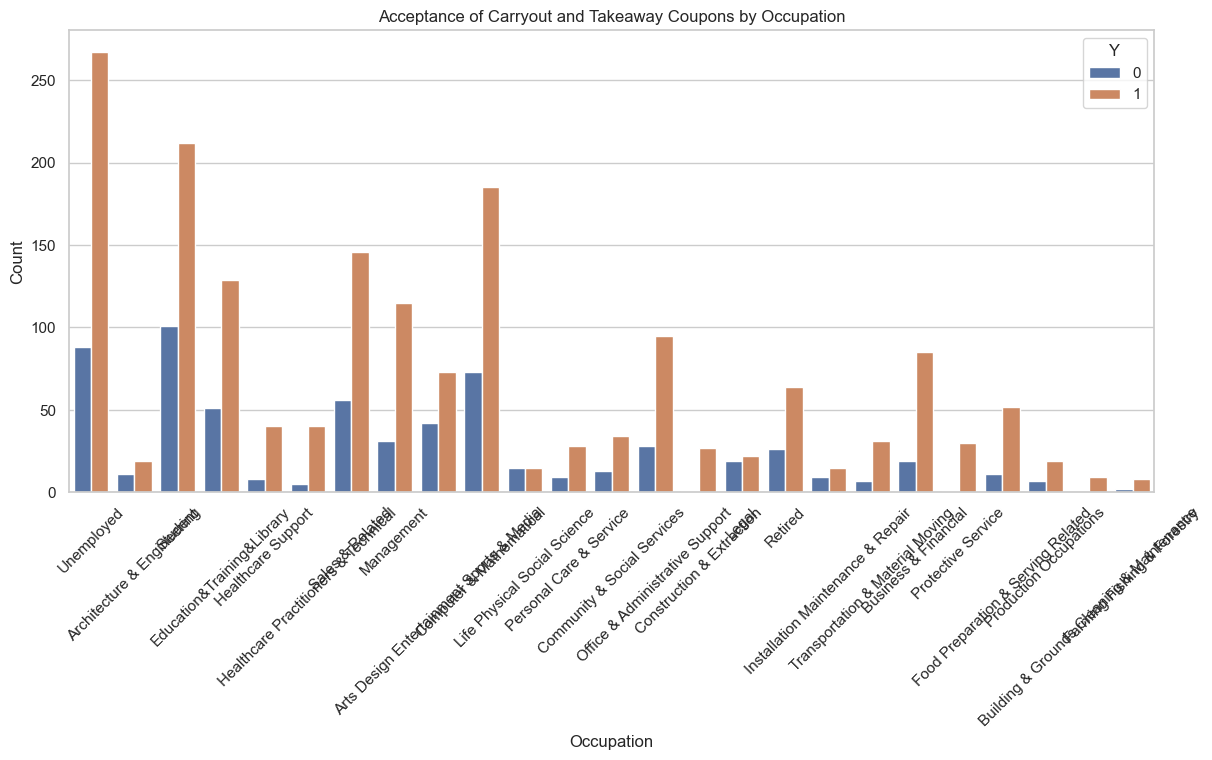

In [466]:
plt.figure(figsize=(14, 6))
sns.countplot(x='occupation', hue='Y', data=carryout_takeaway_df)
plt.title('Acceptance of Carryout and Takeaway Coupons by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.savefig("images/occupation_carryaway")
plt.show()


In [467]:
#Acceptance rate in decimals (proportion)
group_occupation = carryout_takeaway_df.groupby('occupation')['Y'].mean()
print("\nAcceptance Rate by Occupation:")
print(group_occupation)


Acceptance Rate by Occupation:
occupation
Architecture & Engineering                   0.633333
Arts Design Entertainment Sports & Media     0.634783
Building & Grounds Cleaning & Maintenance    1.000000
Business & Financial                         0.817308
Community & Social Services                  0.723404
Computer & Mathematical                      0.717054
Construction & Extraction                    0.964286
Education&Training&Library                   0.716667
Farming Fishing & Forestry                   0.800000
Food Preparation & Serving Related           0.825397
Healthcare Practitioners & Technical         0.888889
Healthcare Support                           0.833333
Installation Maintenance & Repair            0.625000
Legal                                        0.536585
Life Physical Social Science                 0.500000
Management                                   0.787671
Office & Administrative Support              0.772358
Personal Care & Service                

# Acceptance of Carryout and Takeaway Coupons by Income

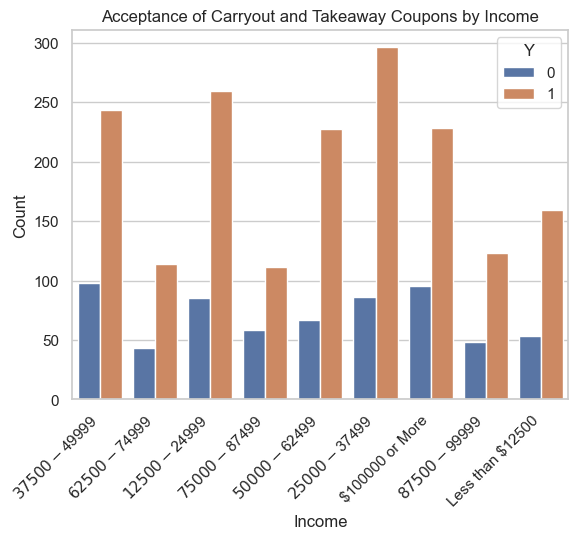

In [468]:
sns.countplot(x='income', hue='Y', data=carryout_takeaway_df)
plt.title('Acceptance of Carryout and Takeaway Coupons by Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.savefig("images/income_carryaway")
plt.show()

In [469]:
#Acceptance rate in decimals (proportion)
group_income = carryout_takeaway_df.groupby('income')['Y'].mean()
print("\nAcceptance Rate by Income:")
print(group_income)


Acceptance Rate by Income:
income
$100000 or More     0.705882
$12500 - $24999     0.752907
$25000 - $37499     0.774869
$37500 - $49999     0.712610
$50000 - $62499     0.772109
$62500 - $74999     0.726115
$75000 - $87499     0.656805
$87500 - $99999     0.719298
Less than $12500    0.750000
Name: Y, dtype: float64


# Takeaways for Carryout and Takeaway coupon

For Passenger,the Carryout and Take away coupons used with Friend(s) or when the member is Alone they tend to have higher acceptance rates. For Gender, Carryout and Take away Coupons used by Males have a slightly higher acceptance rate compared to females.For Age, the ones aged 50 and above show a higher acceptance rate.
For, Marital Status, the ones who are Widowed have a notably higher acceptance rate. For Occupation,the Building & Grounds Cleaning & Maintenance and Protective Service exhibit very high acceptance rates. For Income, the ones incomes between $25000 - $37499 and $50000 - $62499 tend to have higher acceptance rates.


Overall for Carryout and Takeaway coupon members they are generally accepted throughout the demographics, but the main takeawyas are Widowed individuals show a remarkably high acceptance rate, Occupations like Building & Grounds Cleaning & Maintenance and Protective Service have very high acceptance rates and higher acceptance rates are observed among Males, individuals aged 50 and above, and those with incomes between $25000 - $62499.
